In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv("Jamboree_Admission.csv")
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


# Statistical summary

In [ ]:
df.shape

(500, 9)

dropping serial no column beacause it's unuseful for analysis and predictions , it's just like a index number


In [ ]:
df.drop(['Serial No.'],axis=1,inplace=True)

In [ ]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [ ]:
df.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


There is no categorical variable , all the variables are numerical

In [ ]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

in the dataset there is no null values

In [ ]:
df.nunique()

GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 184
Research               2
Chance of Admit       61
dtype: int64

In [ ]:
from scipy.stats import iqr
def outliers(data):
    length_before = len(data)
    Q1 = np.percentile(data,25)
    Q3 = np.percentile(data,75)
    IQR = Q3-Q1
    upperbound = Q3+1.5*IQR
    lowerbound = Q1-1.5*IQR
    if lowerbound < 0:
        lowerbound = 0

    length_after = len(data[(data>lowerbound)&(data<upperbound)])
    return f"{np.round((length_before-length_after)/length_before,4)} % Outliers from input data found"
for col in df.columns:
    print(col," : ",outliers(df[col]))
outliers(df)

GRE Score  :  0.0 % Outliers from input data found
TOEFL Score  :  0.0 % Outliers from input data found
University Rating  :  0.0 % Outliers from input data found
SOP  :  0.0 % Outliers from input data found
LOR   :  0.024 % Outliers from input data found
CGPA  :  0.0 % Outliers from input data found
Research  :  0.44 % Outliers from input data found
Chance of Admit   :  0.004 % Outliers from input data found


'0.0 % Outliers from input data found'

There is very less number of outliers in data so it is negligible

<Axes: >

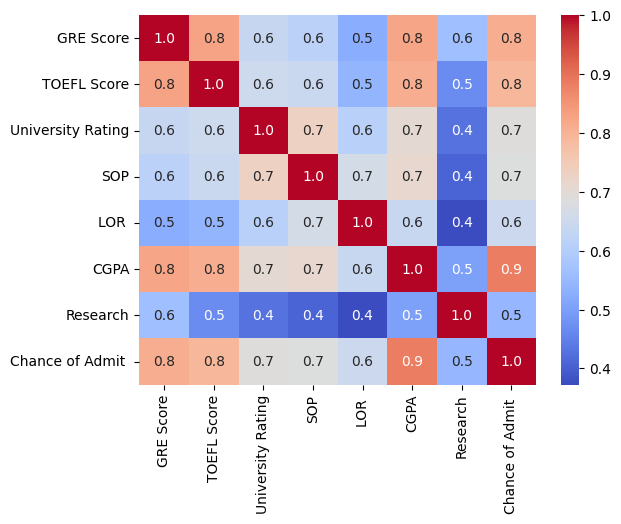

In [ ]:
sns.heatmap(df.corr(),annot=True,fmt=".1f",cmap="coolwarm")

there is positive correlation between all variables

chance of admit is postively correalted to all features CGPA has more impact on chance of admit and Research has less impact compare to other features but above 0.5 all the features are highly correalted with each other

in entire correalation map Research has less impact or negatively correlation with other features

# Graphical Analysis

<Axes: xlabel='Research', ylabel='count'>

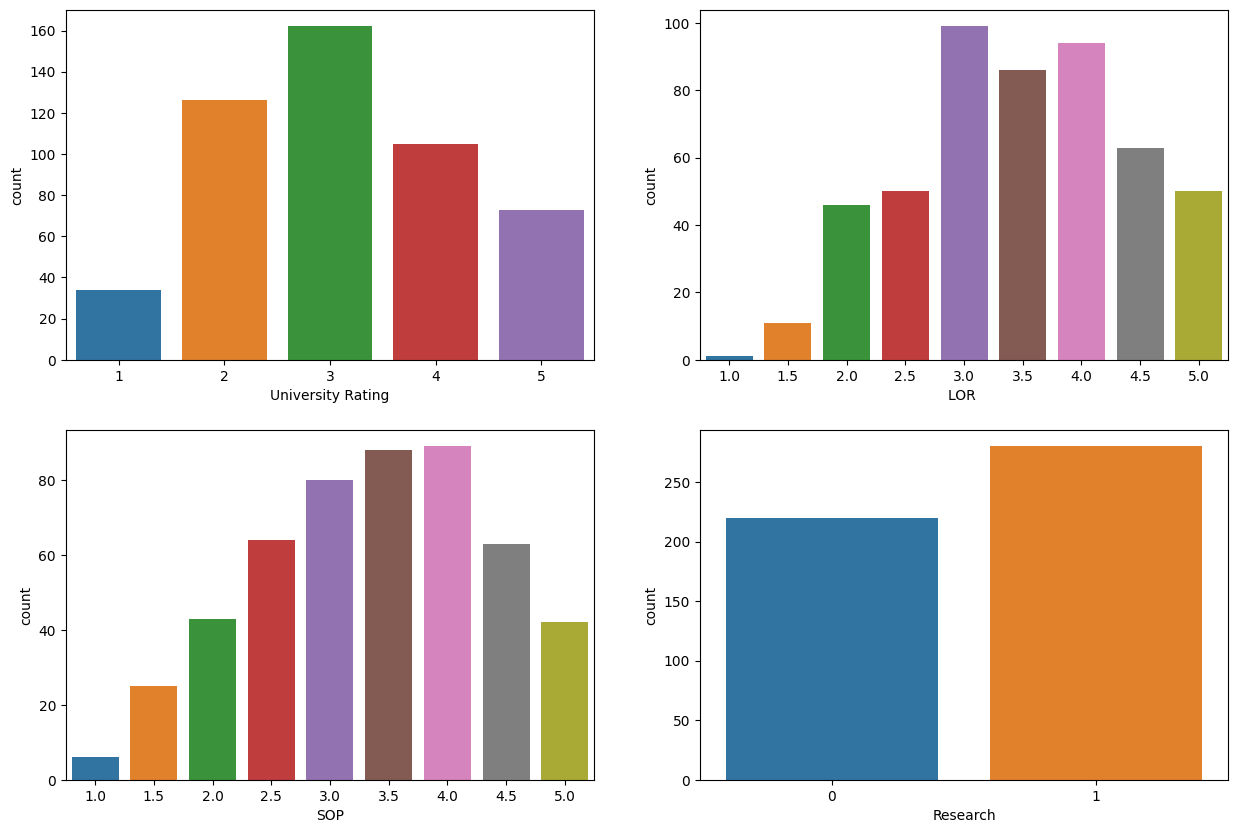

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.countplot(df,x="University Rating")
plt.subplot(2,2,2)
sns.countplot(df,x="LOR ")
plt.subplot(2,2,3)
sns.countplot(df,x="SOP")
plt.subplot(2,2,4)
sns.countplot(df,x="Research")

In the dataset there is more student who has research paper and less students who doesn't have research paper

students with 4.0 SOP rating are more in the dataset

in university rating with 3 rating are more

LOR with 3  rating are more in the dataset

<Axes: xlabel='CGPA', ylabel='Count'>

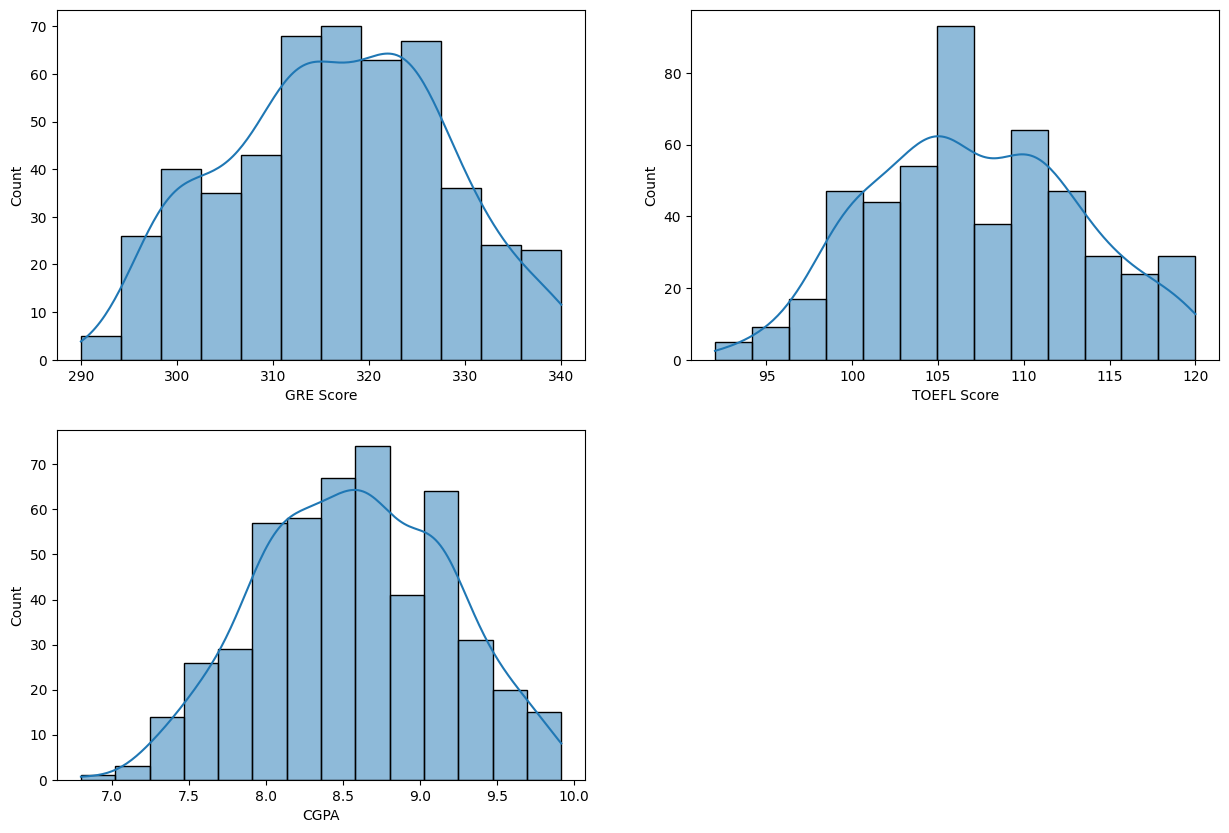

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.histplot(df,x="GRE Score",kde=True)
plt.subplot(2,2,2)
sns.histplot(df,x="TOEFL Score",kde=True)
plt.subplot(2,2,3)
sns.histplot(df,x="CGPA",kde=True)

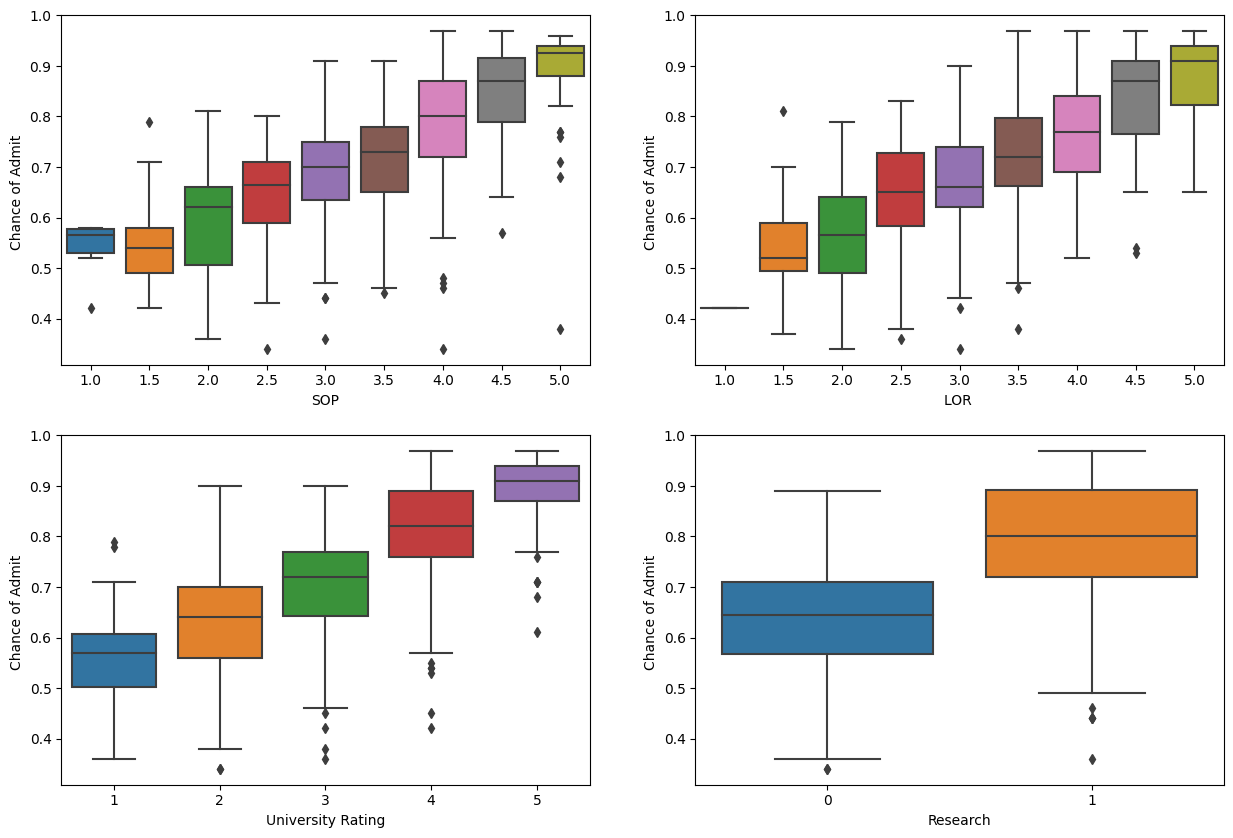

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(y = df["Chance of Admit "], x = df["SOP"])
plt.subplot(2,2,2)
sns.boxplot(y = df["Chance of Admit "], x = df["LOR "])
plt.subplot(2,2,3)
sns.boxplot(y = df["Chance of Admit "], x = df["University Rating"])
plt.subplot(2,2,4)
sns.boxplot(y = df["Chance of Admit "], x = df["Research"])
plt.show()

<Axes: xlabel='TOEFL Score', ylabel='Chance of Admit '>

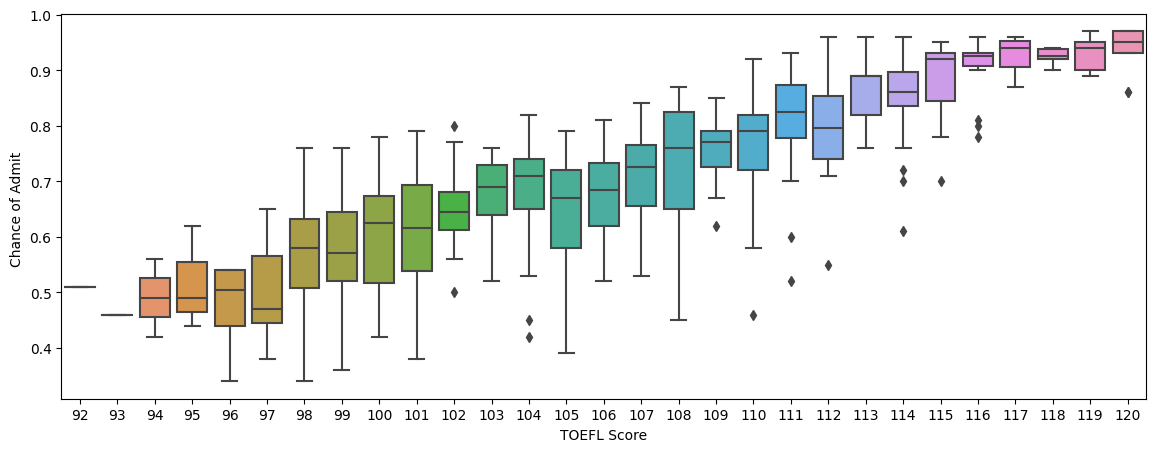

In [ ]:
plt.figure(figsize=(14,5))
sns.boxplot(x=df["TOEFL Score"],y=df["Chance of Admit "])

<Axes: xlabel='GRE Score', ylabel='Chance of Admit '>

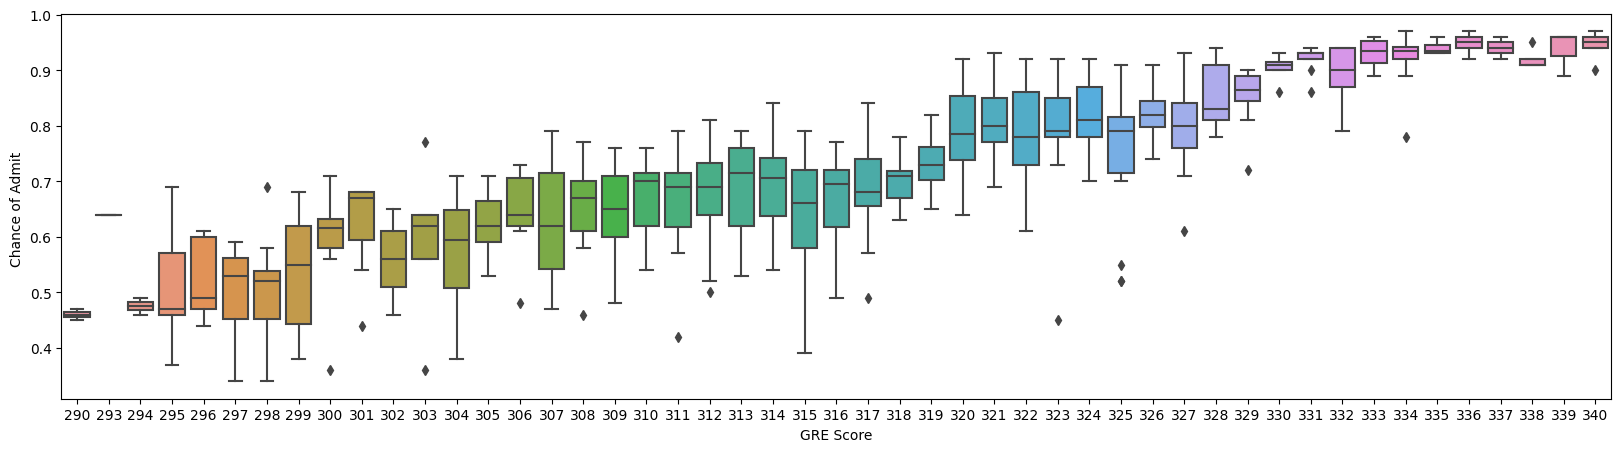

In [ ]:
plt.figure(figsize=(20,5))
sns.boxplot(x=df["GRE Score"],y=df["Chance of Admit "])

All the independent features are highly correlated with target variable so first assumptions for linear regreassion is fulfilled

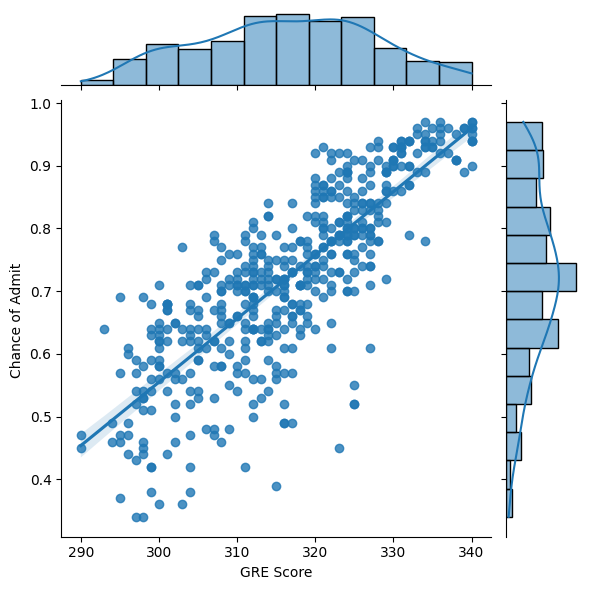

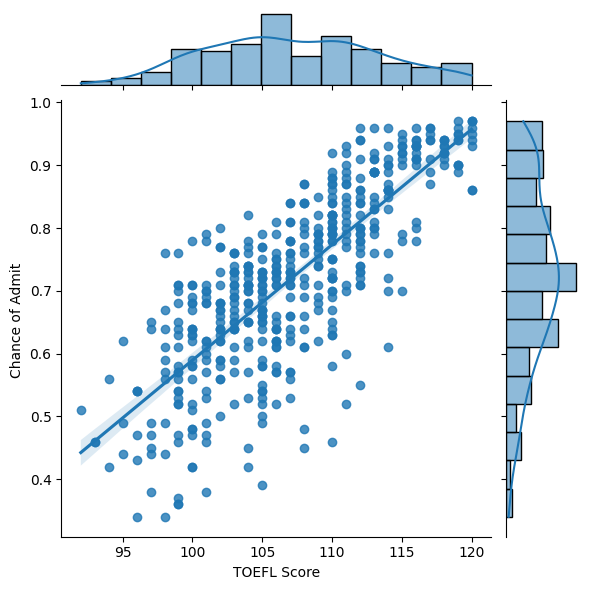

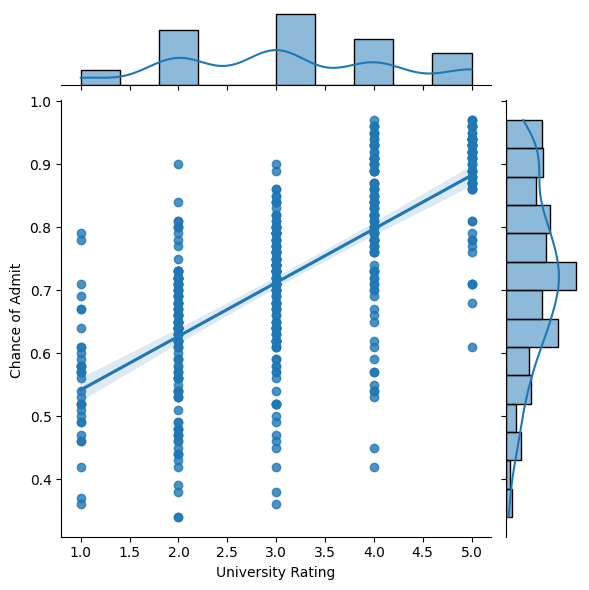

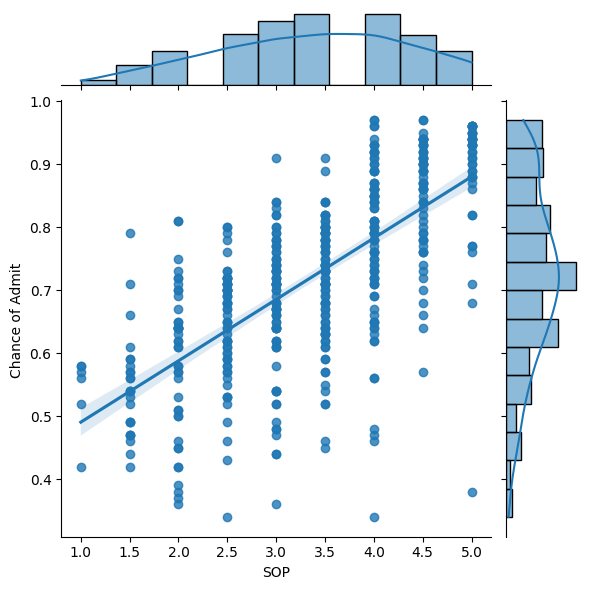

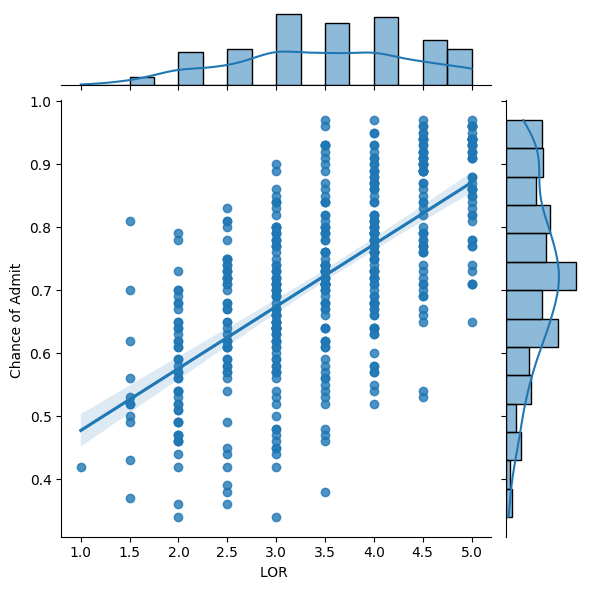

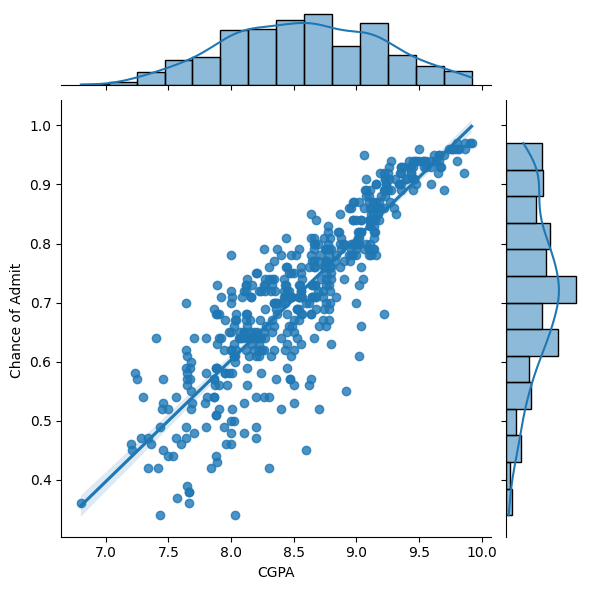

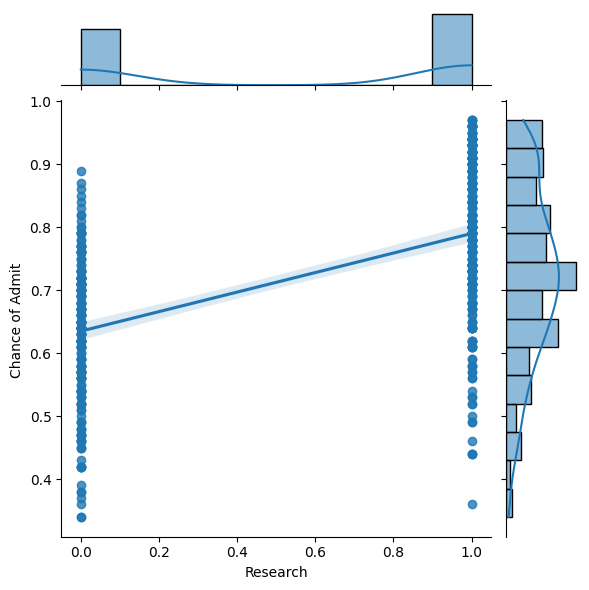

In [ ]:
for i in df.columns[:-1]:
  print(sns.jointplot(y = df["Chance of Admit "], x = df[i],kind='reg'))
  plt.show()

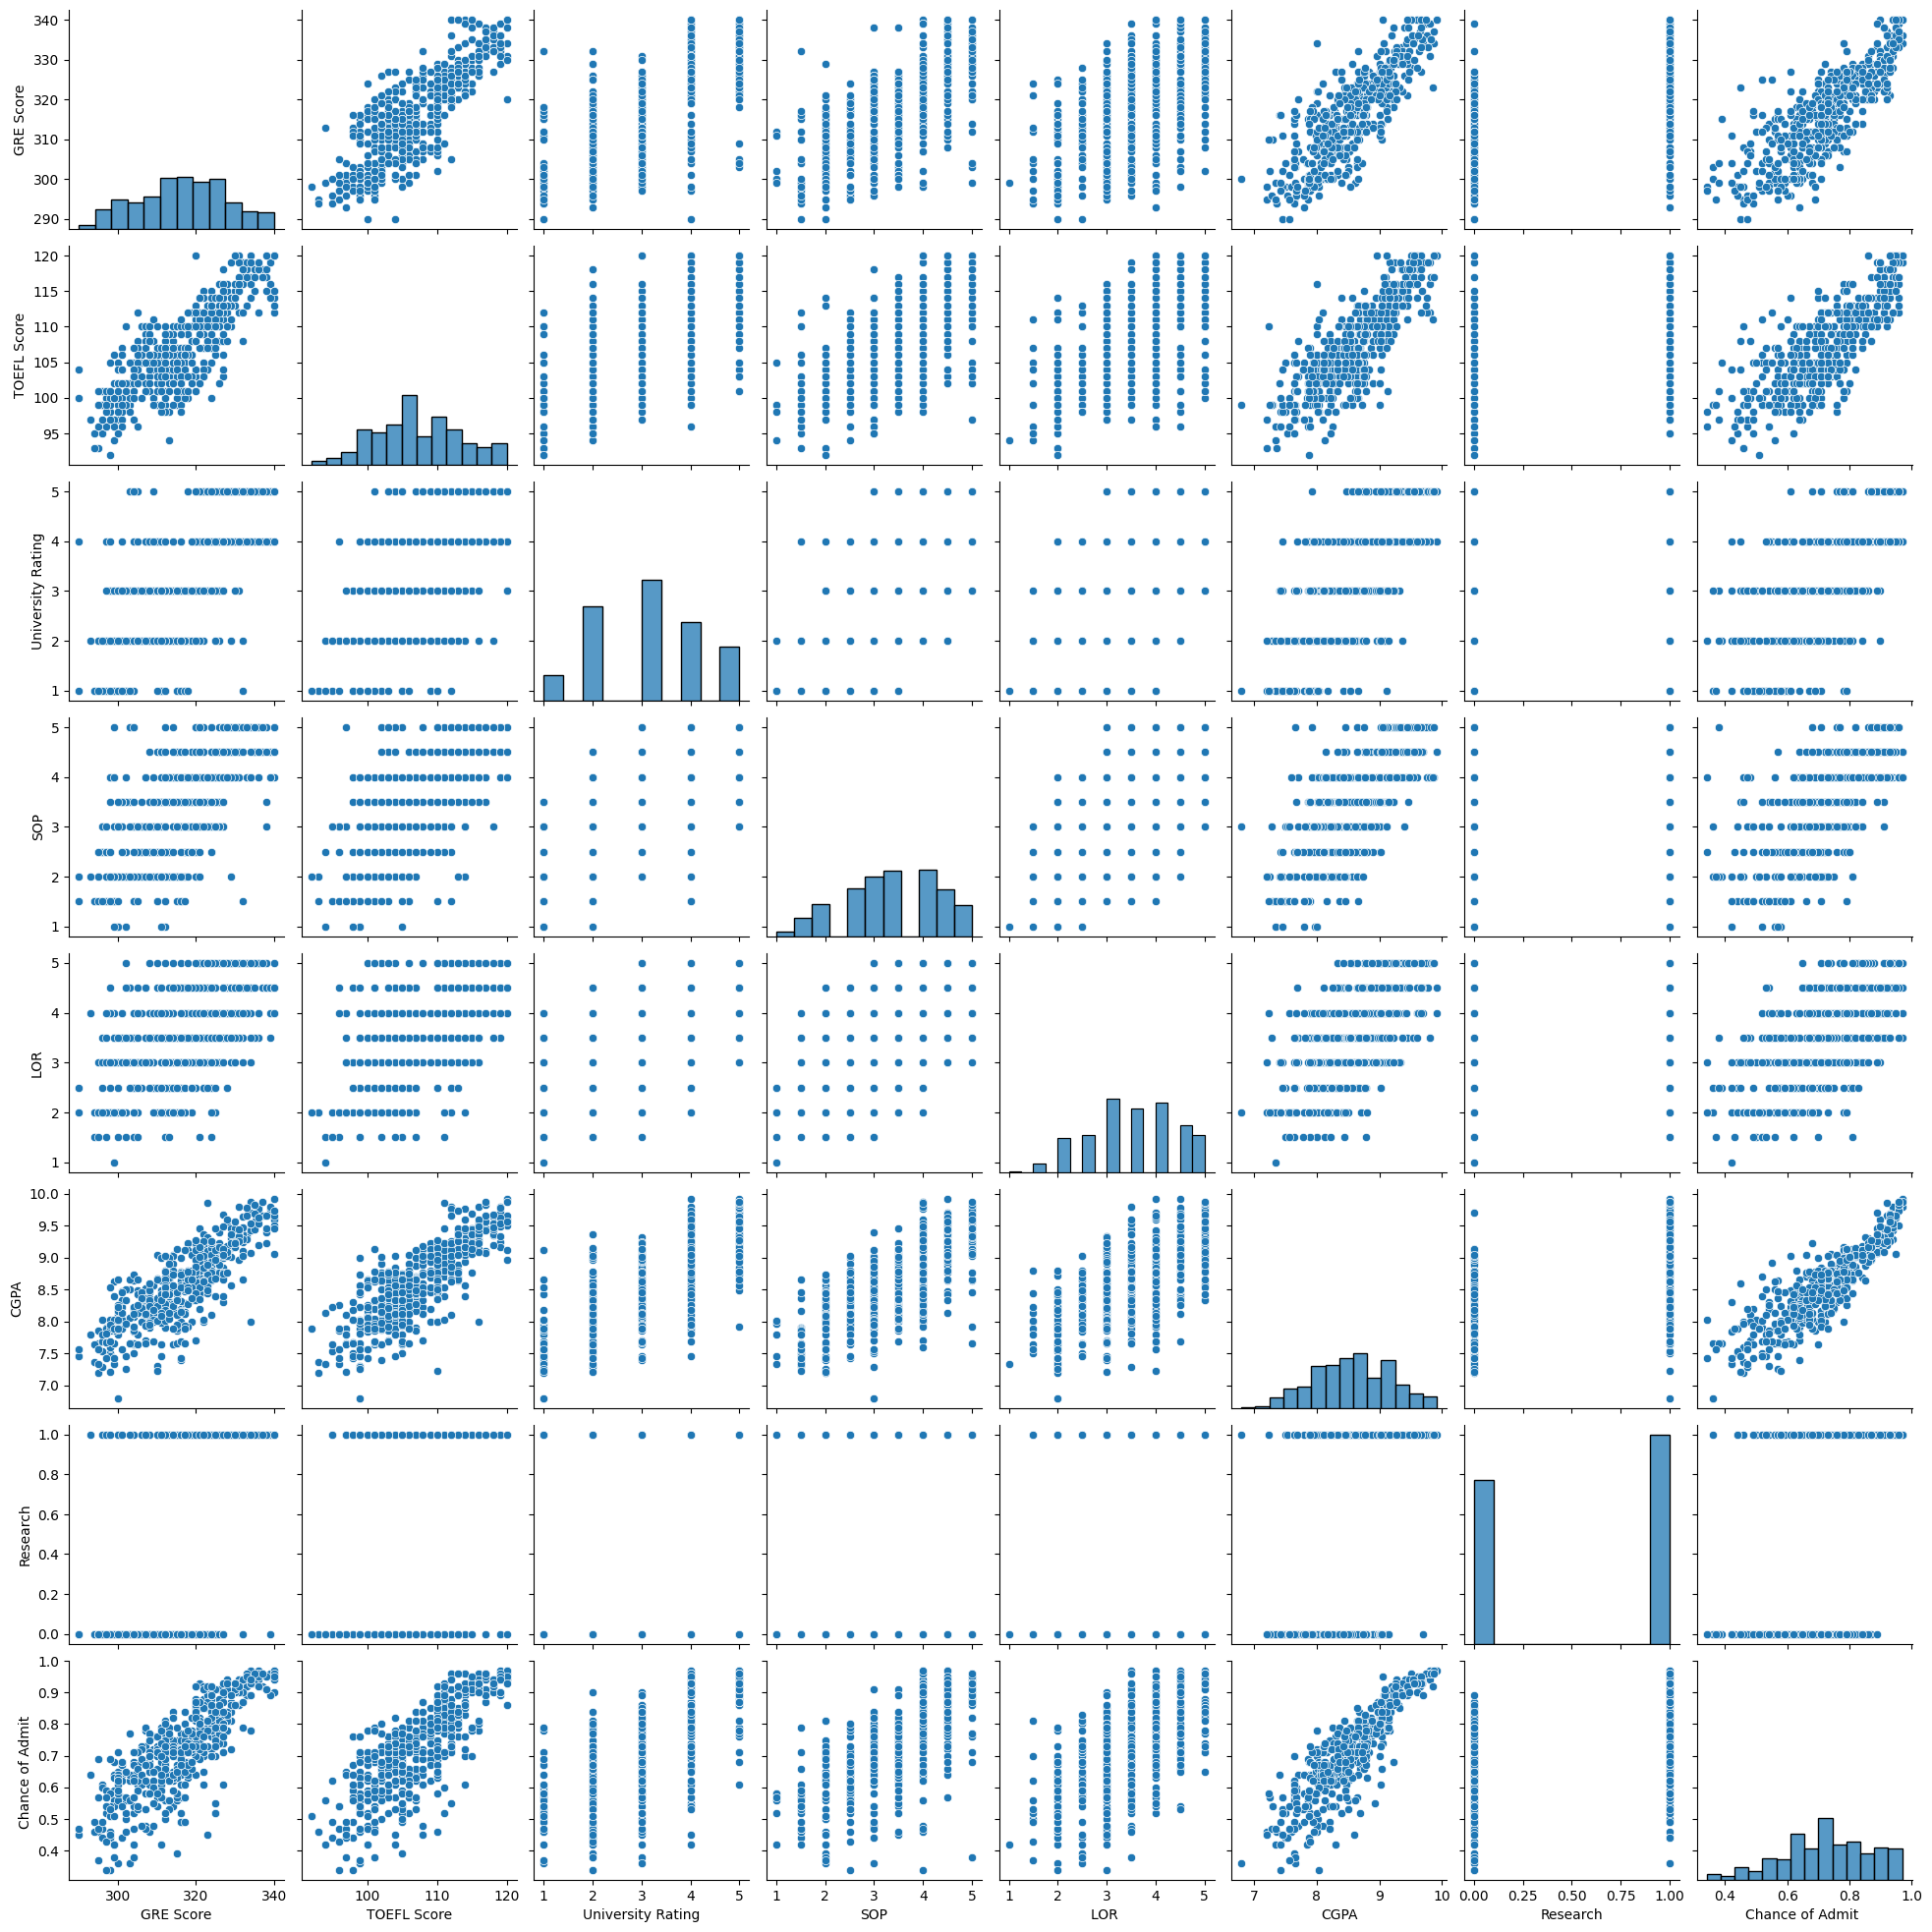

In [ ]:
sns.pairplot(df)

# Linear Regression

In [3]:
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error, adjusted_mutual_info_score

from sklearn.feature_selection import f_regression
import statsmodels.api as sm

**Build the Linear Regression model and comment on the model statistics**

In [4]:
X = df.drop(["Chance of Admit "],axis = 1)  # independent variables
y = df["Chance of Admit "] # target / dependent variables

**Standardising data**

In [ ]:
standardizer = StandardScaler()
standardizer.fit(X)
x = standardizer.transform(X)

In [5]:
X_train , X_test, y_train , y_test = train_test_split(X,y,
                                                     random_state = 1,
                                                      test_size = 0.2
                                                     )

In [10]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [ ]:
#Standardization
from sklearn.preprocessing import StandardScaler
X_train_columns=X_train.columns
std=StandardScaler()
X_train_std=std.fit_transform(X_train)

In [ ]:
X_train=pd.DataFrame(X_train_std, columns=X_train_columns)

In [ ]:
X_train.shape,X_test.shape

((400, 7), (100, 7))

In [ ]:
y_train.shape, y_test.shape

((400,), (100,))

In [7]:
LR=LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [8]:
LR.predict(X_test)

array([0.66142122, 0.70875818, 0.93058632, 0.71351363, 0.84247167,
       0.68254506, 0.7480439 , 0.69358155, 0.788071  , 0.64366453,
       0.67329008, 0.54404074, 0.76593894, 0.78085005, 0.7774029 ,
       0.85378608, 0.6497396 , 0.76892166, 0.88966693, 0.66002735,
       0.63252504, 0.79913989, 0.84972584, 0.60792344, 0.77376535,
       0.58221402, 0.92655493, 0.65494122, 0.85207151, 0.7090972 ,
       0.62646644, 0.82243729, 0.59251817, 0.93155273, 0.5165471 ,
       0.80852267, 0.6875663 , 0.60638345, 0.67598348, 0.92572307,
       0.57159989, 0.68051699, 0.78610283, 0.97160394, 0.78375635,
       0.53121836, 0.6722721 , 0.65405985, 0.67054288, 0.65102329,
       0.82852692, 0.91623652, 0.86089183, 0.62946948, 0.78287043,
       0.6238886 , 0.75778052, 0.61031962, 0.64201892, 0.70534662,
       0.44503147, 0.71029879, 0.74938476, 0.8673361 , 0.99544697,
       0.616503  , 0.74505444, 0.78109496, 0.94778732, 0.69648763,
       0.60773023, 0.66402554, 0.81496609, 0.46890876, 0.91083

In [9]:
y_test

304    0.62
340    0.75
47     0.89
67     0.57
479    0.79
       ... 
11     0.84
192    0.86
92     0.34
221    0.75
110    0.61
Name: Chance of Admit , Length: 100, dtype: float64

In [ ]:
r2_score(y_train,LR.predict(X_train))

0.8215099192361265

In [ ]:
r2_score(y_test,LR.predict(X_test) )

0.8208741703103732

**Display model coefficients and intercept with column names**

In [ ]:
ws=pd.DataFrame(LR.coef_.reshape(1,-1),columns=df.columns[:-1])
ws["Intercept"]=LR.intercept_
ws

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Intercept
0,0.020675,0.019284,0.007001,0.002975,0.013338,0.070514,0.009873,0.722881


**Linear Regression using Statsmodel library**

In [ ]:
import statsmodels.api as sm
X_train= sm.add_constant(X_train)
model = sm.OLS(y_train.values, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     257.7
Date:                Sat, 13 Jan 2024   Prob (F-statistic):          2.10e-142
Time:                        13:40:52   Log-Likelihood:                 559.27
No. Observations:                 400   AIC:                            -1103.
Df Residuals:                     392   BIC:                            -1071.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7209      0.00

In [ ]:
X_train_new=X_train.drop(columns=['SOP','University Rating'])

In [ ]:
model1 = sm.OLS(y_train.values, X_train_new).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     358.8
Date:                Sat, 13 Jan 2024   Prob (F-statistic):          3.24e-144
Time:                        13:42:33   Log-Likelihood:                 557.52
No. Observations:                 400   AIC:                            -1103.
Df Residuals:                     394   BIC:                            -1079.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.7209      0.003    238.342      

**Try out Ridge and Lasso regression**

In [ ]:
from sklearn.linear_model import Ridge  # L2 regualrization
from sklearn.linear_model import Lasso  # L1 regualrization

In [ ]:
y_test.shape

(100,)

In [ ]:
alpha = 0.001  # Regularization strength
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X_train, y_train)

# Predict the values on the test set
y_pred = lasso_model.predict(X_test)

# Calculate and print the coefficients
coefficients = lasso_model.coef_
print(f"Coefficients: {coefficients}")

# Calculate and print the mean squared error on the test set
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Set: {mse:.4f}")

# Plot the true vs predicted values
pd.DataFrame(lasso_model.coef_.reshape(1,-1),columns=df.columns[:-1])

Coefficients: [0.02061605 0.01906871 0.00678179 0.0028076  0.01290261 0.07060527
 0.00927801]
Mean Squared Error on Test Set: 0.0035


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.020616,0.019069,0.006782,0.002808,0.012903,0.070605,0.009278


In [ ]:
RidgeModel = Ridge(alpha = 0.1)
RidgeModel.fit(X_train,y_train)
trainR2 = RidgeModel.score(X_train,y_train)
testR2 = RidgeModel.score(X_test,y_test)

In [ ]:
trainR2,testR2
y_pred = RidgeModel.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mse

0.00345929619172833

In [ ]:
RidgeModel_coefs = pd.DataFrame(RidgeModel.coef_.reshape(1,-1),columns=df.columns[:-1])
RidgeModel_coefs["Intercept"] = RidgeModel.intercept_
RidgeModel_coefs

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Intercept
0,0.020695,0.019296,0.00701,0.00299,0.013342,0.070449,0.009875,0.722882


**Testing the assumptions of the linear regression model**

. Multicollinearity check by VIF score

. The mean of residuals is nearly zero

. Linearity of variables  

. Test for Homoscedasticity

. Normality of residuals

In [ ]:
vif_score = []

for i in range(X_train.shape[1]):
    vif_score.append((variance_inflation_factor(exog = X_train,exog_idx=i)))
vif_score

[4.873264779539272,
 4.243883338617031,
 2.798251888543383,
 2.9200455031169206,
 2.079334304516445,
 4.751389166380193,
 1.5081475402055684]

In [ ]:
pd.DataFrame({ "coef_name : " : X.columns ,"vif : ": np.around(vif_score,2)})


,coef_name :,vif :
0,GRE Score,4.87
1,TOEFL Score,4.24
2,University Rating,2.80
3,SOP,2.92
4,LOR,2.08
5,CGPA,4.75
6,Research,1.51


There is not much high multicolinearity in between features because VIF score is below 5

In [ ]:
#checking mean of residuals (y - y_predict)
residuals=np.array(residuals)
residuals=residuals.reshape(-1)
np.mean(residuals)

0.0

The mean of residuals is  zero

<ipython-input-51-2b0aac540784>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals)


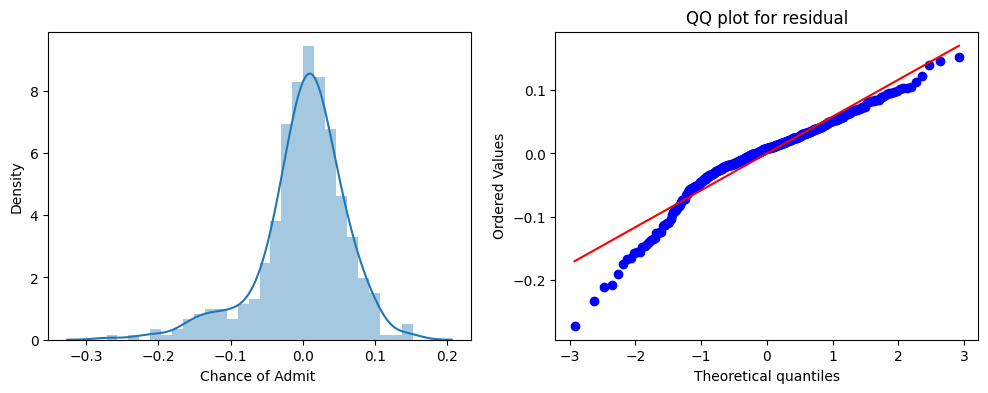

In [ ]:
from scipy import stats
y_predicted = LR.predict(X_train)
residuals = (y_train - y_predicted)
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(residuals)
plt.subplot(1,2,2)
stats.probplot(residuals, plot = plt)
plt.title('QQ plot for residual')
plt.show()

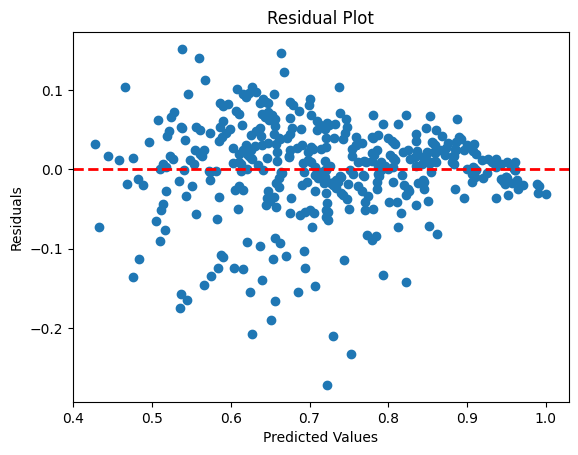

In [ ]:
plt.scatter(y_predicted, residuals)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)  # Add a horizontal line at y=0
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

there is not any pattern in plot so error is constant not changing frequetly

**Model performance evaluation Metrics**

In [ ]:
def AdjustedR2score(R2,n,d):
    return 1-(((1-R2)*(n-1))/(n-d-1))

In [ ]:
y_pred = LR.predict(X_test)

print("MSE:",mean_squared_error(y_test,y_pred)) # MSE
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred))) #RMSE
print("MAE :",mean_absolute_error(y_test,y_pred) ) # MAE
print("r2_score:",r2_score(y_test,y_pred)) # r2score
print("Adjusted R2 score :", AdjustedR2score(r2_score(y_test,y_pred),len(X),X.shape[1]))

MSE: 0.0034590988971363815
RMSE: 0.05881410457650768
MAE : 0.040200193804157944
r2_score: 0.8208741703103732
Adjusted R2 score : 0.8183256320830818


# Actionable Insights & Recommendations

**Insights**

I already mentioned below each cell

**Recommendations**

. Education instituted should work more on to write a good SOP and LOR to
students for getting good university
because in this dataset SOP has not much impact on model

. One more advise should add in your website for how many hours students have to spend on particular area for getting good marks

. conduct a seminar among students for creating awareness on how to get good CGPA and how it will impact on your chance of admit
